# Tomato Leaf Detection

# Import all dependencies

In [38]:

import tensorflow as tf
import numpy as np # linear algebra
#import pandas as pd
import os

# Renaming of photos

In [52]:
import os
path = r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\tomato diseases\Tomato___Bacterial_spot"
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))


# path link

In [41]:
path = r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf" 
os.listdir(path)

['disease', 'real images', 'test', 'train', 'val']

# Join train and test with path

In [42]:
import os
train_path = os.path.join(path, "train")
print(os.listdir(train_path))

print("*"*120)

val_path = os.path.join(path, "val")
print(os.listdir(val_path))

print("*"*120)

test_path = os.path.join(path, "test")
print(os.listdir(test_path))

print("-"*120)
print("-"*120)

real_path = os.path.join(path, "disease")
print(os.listdir(real_path))


['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
************************************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
************************************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------

# glob function

In [43]:
from glob import glob
folders = glob(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\train\*") 
folders

['C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___Early_blight',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___healthy',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [44]:
from glob import glob
folders = glob(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\val\*") 
folders

['C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___Bacterial_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___Early_blight',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___healthy',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\val\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [45]:
from glob import glob
folders = glob(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\test\*") 
folders

['C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___Bacterial_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___Early_blight',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___healthy',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\visha\\Music\\PythonCodes\\college miniproject\\tomato leaf\\test\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# resize image to 224*224

In [98]:
import PIL
import os
import os.path
from PIL import Image

f =  r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\train\Tomato___healthy"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

# Displaying the images

Text(0.5, 1.0, 'Bacterial Spot')

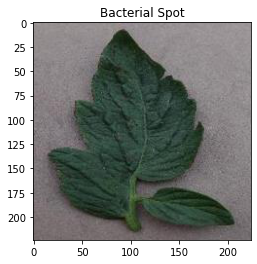

In [46]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\train\Tomato___Bacterial_spot\0.jpg"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

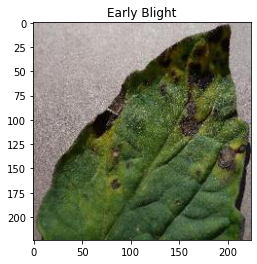

In [47]:
plt.imshow(plt.imread(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\train\Tomato___Early_blight\0.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Healthy')

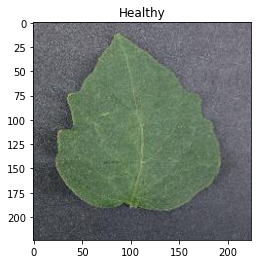

In [48]:
plt.imshow(plt.imread(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\train\Tomato___healthy\0.JPG"))
plt.title("Healthy")

# import necessary packages

In [49]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# image size

In [50]:
SIZE = [224, 224]

# import VGG19

In [51]:
from tensorflow.keras.applications.vgg19 import VGG19

# vgg19 with input shape and weight is imagenet

In [52]:
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [53]:
for layer in vg19.layers:
    layer.trainable = False

In [54]:
x = Flatten()(vg19.output)

In [55]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

# VGG19 model summary

In [56]:
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Compile model

In [57]:
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Data Augmentation

In [58]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)
val_datagen_vg19=ImageDataGenerator(rescale=1./255)

In [59]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
trainning_set_vg19

Found 6000 images belonging to 6 classes.


In [60]:
test_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 150 images belonging to 6 classes.


In [61]:
val_set_vg19 = val_datagen_vg19.flow_from_directory(val_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 450 images belonging to 6 classes.


# model fit_genrator

In [62]:
r_vg19 = modelvg.fit(trainning_set_vg19,
                       validation_data=val_set_vg19,
                       epochs=23,
                       steps_per_epoch=len(trainning_set_vg19),
                       validation_steps=len(val_set_vg19)
                       )

Epoch 1/23
188/188 [==============================] - 1146s 6s/step - loss: 1.1099 - accuracy: 0.6441 - val_loss: 0.4313 - val_accuracy: 0.8578
Epoch 2/23
188/188 [==============================] - 1137s 6s/step - loss: 0.3121 - accuracy: 0.8883 - val_loss: 0.3993 - val_accuracy: 0.8778
Epoch 3/23
188/188 [==============================] - 1132s 6s/step - loss: 0.2382 - accuracy: 0.9149 - val_loss: 0.3956 - val_accuracy: 0.8933
Epoch 4/23
188/188 [==============================] - 1138s 6s/step - loss: 0.2048 - accuracy: 0.9266 - val_loss: 0.3369 - val_accuracy: 0.8911
Epoch 5/23
188/188 [==============================] - 1167s 6s/step - loss: 0.1754 - accuracy: 0.9432 - val_loss: 0.2314 - val_accuracy: 0.9311
Epoch 6/23
188/188 [==============================] - 1200s 6s/step - loss: 0.1140 - accuracy: 0.9603 - val_loss: 0.2894 - val_accuracy: 0.9133
Epoch 7/23
188/188 [==============================] - 1180s 6s/step - loss: 0.1091 - accuracy: 0.9628 - val_loss: 0.2792 - val_accuracy:

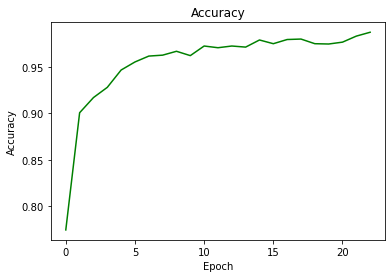

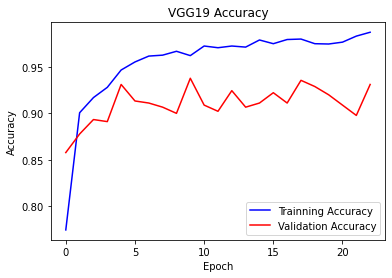

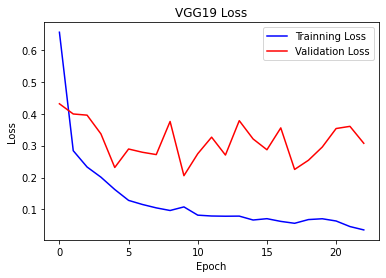

In [63]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
#Accuracy of model
plt.title("Accuracy")
plt.plot(accuracy,"g",label="Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
#comparsion of validation and training accuracy
plt.title("VGG19 Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy, "b", label="Trainning Accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation Accuracy")
plt.legend()
plt.show()
#comparsion of validation and training loss
plt.title("VGG19 Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epochs, loss, "b", label="Trainning Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.legend()
plt.show()



In [66]:
y_pred = modelvg.predict(test_set_vg19)
y_pred


array([[2.89011467e-07, 3.23445201e-02, 3.02847102e-03, 9.61066663e-01,
        3.14720348e-03, 4.12924448e-04],
       [5.48210430e-14, 8.48932383e-11, 2.57167243e-09, 1.55750291e-13,
        1.00000000e+00, 1.01117621e-11],
       [3.59746629e-12, 2.71843827e-08, 1.22256608e-06, 9.99640477e-08,
        9.99998689e-01, 6.00743327e-12],
       [1.02641576e-10, 8.37193870e-09, 9.99939680e-01, 5.75609227e-10,
        6.02990367e-05, 3.10382579e-12],
       [2.17478568e-08, 3.58641963e-04, 4.26499813e-04, 3.66650374e-06,
        9.99211192e-01, 1.85687743e-09],
       [8.33752751e-01, 1.65761679e-01, 3.31669697e-04, 9.99172044e-05,
        5.36715452e-05, 3.56044637e-07],
       [4.99723967e-07, 8.75906229e-01, 1.24043763e-01, 4.94820415e-05,
        5.20756060e-08, 3.84598398e-09],
       [7.72973726e-06, 9.98518765e-01, 1.47352181e-03, 4.28413305e-10,
        9.53883528e-10, 2.15522999e-09],
       [4.50479633e-14, 5.07366871e-10, 6.17890406e-10, 4.86382878e-10,
        1.00000000e+00, 

In [67]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 4, 4, 2, 4, 0, 1, 1, 4, 5, 5, 2, 2, 3, 3, 2, 3, 3, 5, 4, 3, 2,
       1, 2, 1, 1, 0, 5, 3, 0, 5, 4, 5, 0, 4, 5, 2, 1, 4, 1, 0, 3, 0, 5,
       3, 2, 3, 0, 2, 2, 2, 3, 3, 1, 2, 5, 4, 0, 5, 2, 2, 2, 0, 3, 5, 5,
       0, 1, 0, 0, 3, 0, 4, 1, 3, 2, 5, 2, 1, 2, 4, 0, 4, 1, 5, 4, 0, 3,
       4, 3, 0, 5, 5, 3, 4, 1, 5, 0, 5, 1, 0, 5, 0, 1, 1, 1, 5, 3, 5, 4,
       5, 0, 5, 2, 2, 3, 1, 4, 4, 1, 0, 0, 2, 2, 0, 0, 4, 0, 3, 2, 5, 3,
       4, 0, 4, 0, 2, 1, 1, 3, 2, 5, 4, 2, 0, 4, 5, 4, 4, 3], dtype=int64)

# Validation Accuracy

In [68]:
score = model.evaluate(val_set_vg19,batch_size=32)
print(" Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

15/15 [==============================] - 77s 5s/step - loss: 0.3898 - accuracy: 0.9089
 Accuracy: 90.89%
Loss:  0.38981980085372925


# Test Accuracy

In [69]:
score = model.evaluate(test_set_vg19,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

5/5 [==============================] - 25s 5s/step - loss: 0.2126 - accuracy: 0.9267
Accuracy: 92.67%
Loss:  0.2125827968120575


# Tomato Bacterial Spot

In [70]:
test_img = plt.imread(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\test\Tomato___Bacterial_spot\22.jpg")

# Visualize

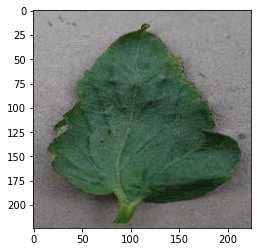

In [71]:
plt.imshow(test_img)

# Save model

In [72]:
modelvg.save("vgg_19tl.model")

INFO:tensorflow:Assets written to: vgg_19tl.model\assets


# load a image and detection

In [73]:
import cv2
import tensorflow as tf
import numpy as np
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("vgg_19tl.model")

# prediction

In [74]:
prediction = model.predict([prepare(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\test\Tomato___Tomato_mosaic_virus\15.jpg")])
c=np.argmax(prediction)
c

4

In [75]:
prediction = model.predict([prepare(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\test\Tomato___Tomato_Yellow_Leaf_Curl_Virus\5.jpg")])
b=np.argmax(prediction)
b


3

# Class Dictionary

In [76]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Septoria_leaf_spot': 2,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 3,
 'Tomato___Tomato_mosaic_virus': 4,
 'Tomato___healthy': 5}

# label

In [77]:

list=["Bacterial_spot","Early_Blight","Septoria Leaf Mold","Yellow Leaf Curl Virus","Mosaic Virus","Healthy"]
c=np.argmax(prediction)
print(list[c])
c

Yellow Leaf Curl Virus


3

Healthy
Solution:

The leaf is healthy!!!! 


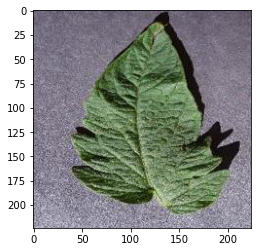

In [78]:
list=["Bacterial_spot","Early_Blight","Septoria Leaf Mold","Yellow Leaf Curl Virus","Mosaic Virus","Healthy"]
sol=["1.Copper fungicides will deny bacterial spot growth for two to four weeks after application.\n"
     "2.Copper sprays are most effective when used before any signs of the disease are present as a preventative treatment.",
     "1.Good airflow will help keep the plants dry.Provide space for plants."
     "2.Copper or sulphur sprays and biofungicide serenade can prevent growth of fungus on other parts .\n",
    "1.Copper sprays and Serenade® are somewhat effective at halting the spread of symptoms."
     "\n2.Remove infected leaves to prevent the spread of spores to other leaves, as water splashing on the leaves helps transmit the disease.","yellow",
    "1.Remove all infected plants and destroy them. Do NOT put them in the compost pile, as the virus may persist in infected plant matter"
"2.Monitor the rest of your plants closely, especially those that were located near infected plants."
"3.Disinfect gardening tools after every use.",
    "The leaf is healthy!!!! "]
     
path=r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\test\Tomato___healthy\10.jpg"
img = plt.imread(path)
prediction = model.predict([prepare(path)])
a=np.argmax(prediction)
print(list[a])
plt.imshow(img)
print("Solution:\n")
print(sol[a])



In [1]:
import cv2
import tensorflow as tf
import numpy as np
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)


model = tf.keras.models.load_model("vgg_19tl.model")

import matplotlib.pyplot as plt
def myfun(path):
    list=["Bacterial_spot","Early_Blight","Septoria Leaf Mold","Yellow Leaf Curl Virus","Mosaic Virus","Healthy"]
    sol=["1.Copper fungicides will deny bacterial spot growth for two to four weeks after application.\n"
         "2.Copper sprays are most effective when used before any signs of the disease are present as a preventative treatment.",
         "1.Good airflow will help keep the plants dry.Provide space for plants.\n"
         "\n2.Copper or sulphur sprays and biofungicide serenade can prevent growth of fungus on other parts.",
        "1.Copper sprays and Serenade® are somewhat effective at halting the spread of symptoms."
         "\n2.Remove infected leaves to prevent the spread of spores to other leaves, as water splashing on the leaves helps transmit the disease.",
         "\n1.If symptomatic plants have no whiteflies on the lower leaf surface, these plants can be cut from the garden and BURIED in the compost."
"\n2.If whiteflies are beginning to appear, spray with azadirachtin (Neem), pyrethrin or insecticidal soap.  insecticides be rotated at each spraying." 
"\n3.Spray the undersides of the leaves thoroughly.",
        "1.Remove all infected plants and destroy them. Do NOT put them in the compost pile, as the virus may persist in infected plant matter"
    "2.Monitor the rest of your plants closely, especially those that were located near infected plants."
    "3.Disinfect gardening tools after every use.",
        "The leaf is healthy!!!! "]
    img = plt.imread(path)
    prediction = model.predict([prepare(path)])
    a=np.argmax(prediction)
    print(list[a])
    plt.imshow(img)
    print("\nSolution:\n")
    print(sol[a])
    
myfun("C:/Users/visha/Music/PythonCodes/college miniproject/tomato leaf/test/Tomato___healthy/10.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/visha/Music/PythonCodes/college miniproject/tomato leaf/test/Tomato___healthy/10.jpg'

Healthy

Solution:

The leaf is healthy!!!! 


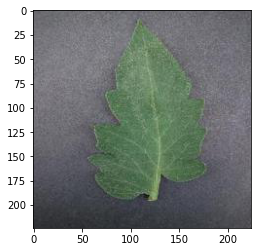

In [86]:
myfun("C:/Users/visha/Music/PythonCodes/college miniproject/tomato leaf/test/Tomato___healthy/16.jpg")



Early_Blight

Solution:

1.Good airflow will help keep the plants dry.Provide space for plants.

2.Copper or sulphur sprays and biofungicide serenade can prevent growth of fungus on other parts.


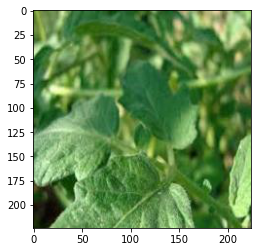

In [81]:

myfun(r"C:\Users\visha\Music\PythonCodes\college miniproject\tomato leaf\disease\Tomato___healthy\5.jpg")
